# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left") 

# Display the data table for preview
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice. COUNT UNIQUE MOUSE ID
mouse_count = len(complete_data["Mouse ID"].unique())
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

complete_data[complete_data[["Mouse ID", "Timepoint"]].duplicated()]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 

complete_data[complete_data[["Mouse ID", "Timepoint"]].duplicated()]


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_clean = complete_data.drop([137, 360, 681, 869, 1111],inplace=True)

In [5]:
complete_data.drop(complete_data[(complete_data["Mouse ID"] == "g989")].index, inplace=True)

In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(complete_data["Mouse ID"].unique())
mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_vol = complete_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
med_tumor_vol = complete_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
var_tumor_vol = complete_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
sdev_tumor_vol = complete_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem_tumor_vol = complete_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_stats = pd.DataFrame({"Mean Tumor Volume":mean_tumor_vol,
                             "Median Tumor Volume":med_tumor_vol,
                             "Tumor Volume Variance":var_tumor_vol,
                             "Tumor Volume Std Dev":sdev_tumor_vol,
                             "Tumor Volume Std Err":sem_tumor_vol
                             })

summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

#mean_numpy = np.mean["Tumor Volume (mm3)"] COME BACK TO
# Using the aggregation method, produce the same summary statistics in a single line.


## Bar and Pie Charts

In [32]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Filter the DataFrame down only to those columns to chart
drug_timepoints = complete_data[["Drug Regimen","Timepoint"]]
    
# Set the index to be "State" so they will be used as labels
drug_timepoints = drug_timepoints.set_index("Timepoint")

drug_timepoints.plot(kind="bar", figsize=(10,5))

plt.title("Number of Mice Tested")

plt.show()

TypeError: no numeric data to plot

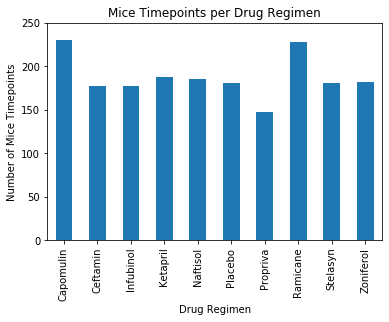

In [40]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(complete_data))
tick_locations = [value for value in x_axis]

grouped_complete = complete_data.groupby("Drug Regimen")["Timepoint"].count()

grouped_complete.plot(kind='bar')
#plt.figure(figsize=(10,5))
#plt.bar(grouped_complete["Drug Regimen"], color='b', alpha=0.5, align="center")
#plt.xticks(rotation="vertical")

# Set y limit
#plt.ylim(0, max(complete_data["Timepoint"].count()))

plt.ylim(0,250)

# Set a Title and labels
plt.title("Mice Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Timepoints")
plt.show()



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



ValueError: could not convert string to float: 'Female'

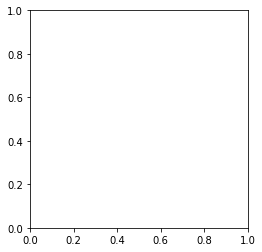

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = complete_data["Sex"]
sizes = complete_data["Sex"]
colors = ["orange", "blue"]
explode = (0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        startangle=140)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

